## Анализ данных и создание модели машинного обучения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


доступные признаки: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke. В столбцах с гипертензией, заболеваниями сердца и инсультом 0-признак отсутствует, 1-признак есть.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)

In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.70,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.80,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.40,0.00
75%,54682.00,61.00,0.00,0.00,114.09,32.80,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


разделим признаки на дискреные и категорийные, удаляем столбец id и создаем глубокую копию, чтобы исходная таблица осталась в порядке для следующих шагов

In [7]:
data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


сравним средние значения для пациентов, перенесших инсульт и тех, у кого его не было

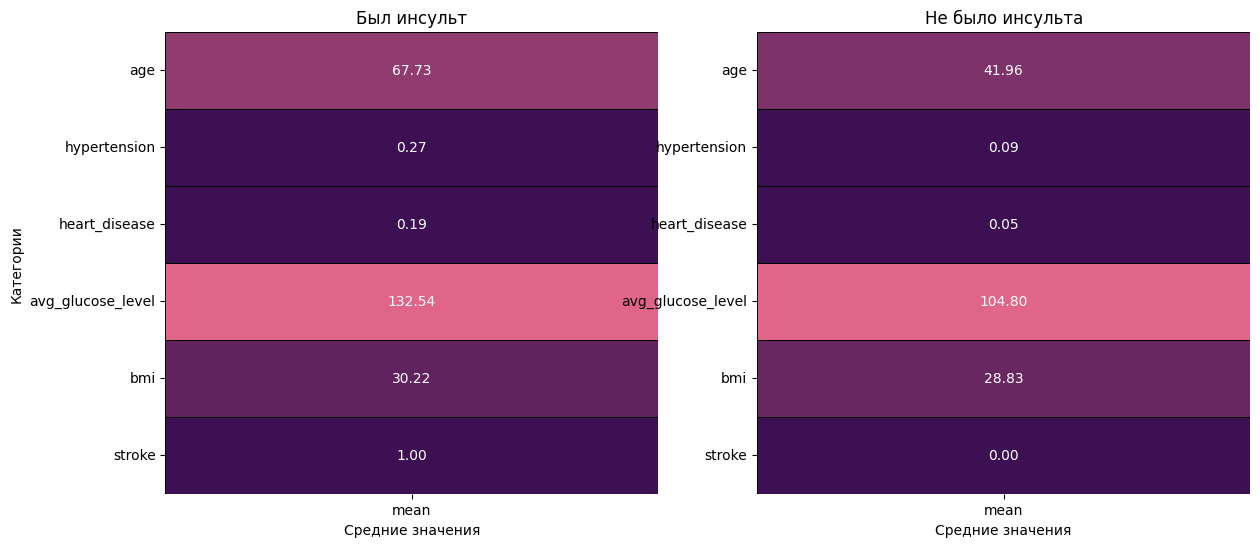

In [8]:
from matplotlib.colors import LinearSegmentedColormap

stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

# Создаём цветовую карту
colors = ['#3C1053', '#DF6589']
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Создаём фигуру и subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Heatmap для stroke
sns.heatmap(stroke[['mean']], annot=True, cmap=cmap, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('Был инсульт')
ax[0].set_xlabel('Средние значения')
ax[0].set_ylabel('Категории')

# Heatmap для no_stroke
sns.heatmap(no_stroke[['mean']], annot=True, cmap=cmap, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('Не было инсульта')
ax[1].set_xlabel('Средние значения')

# Показываем график
plt.show()

для последующей рааботы нужно применить кодирование меток к категориаьным текстовым признакам данных

In [9]:
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3, l4 = [], []
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique()))
    l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 880.45it/s]

gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'} 
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {np.int64(1): 'Male', np.int64(0): 'Female', np.int64(2): 'Other'},
 'ever_married': {np.int64(1): 'Yes', np.int64(0): 'No'},
 'work_type': {np.int64(2): 'Private',
  np.int64(3): 'Self-employed',
  np.int64(0): 'Govt_job',
  np.int64(4): 'children',
  np.int64(1): 'Never_worked'},
 'Residence_type': {np.int64(1): 'Urban', np.int64(0): 'Rural'},
 'smoking_status': {np.int64(1): 'formerly smoked',
  np.int64(2): 'never smoked',
  np.int64(3): 'smokes',
  np.int64(0): 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

теперь оценим распределение дискретных признаков

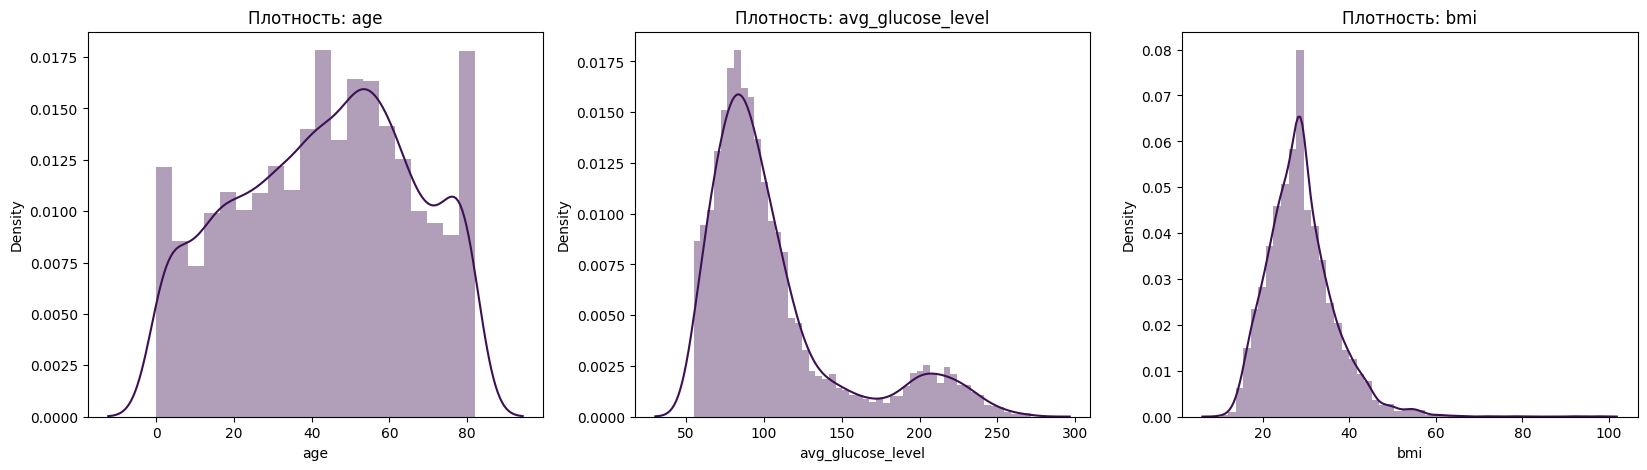

In [11]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Плотность: ' + discrete_features[i]
    plt.title(title)
plt.show()

и дискретные признаки относительно целевого (инсульта)

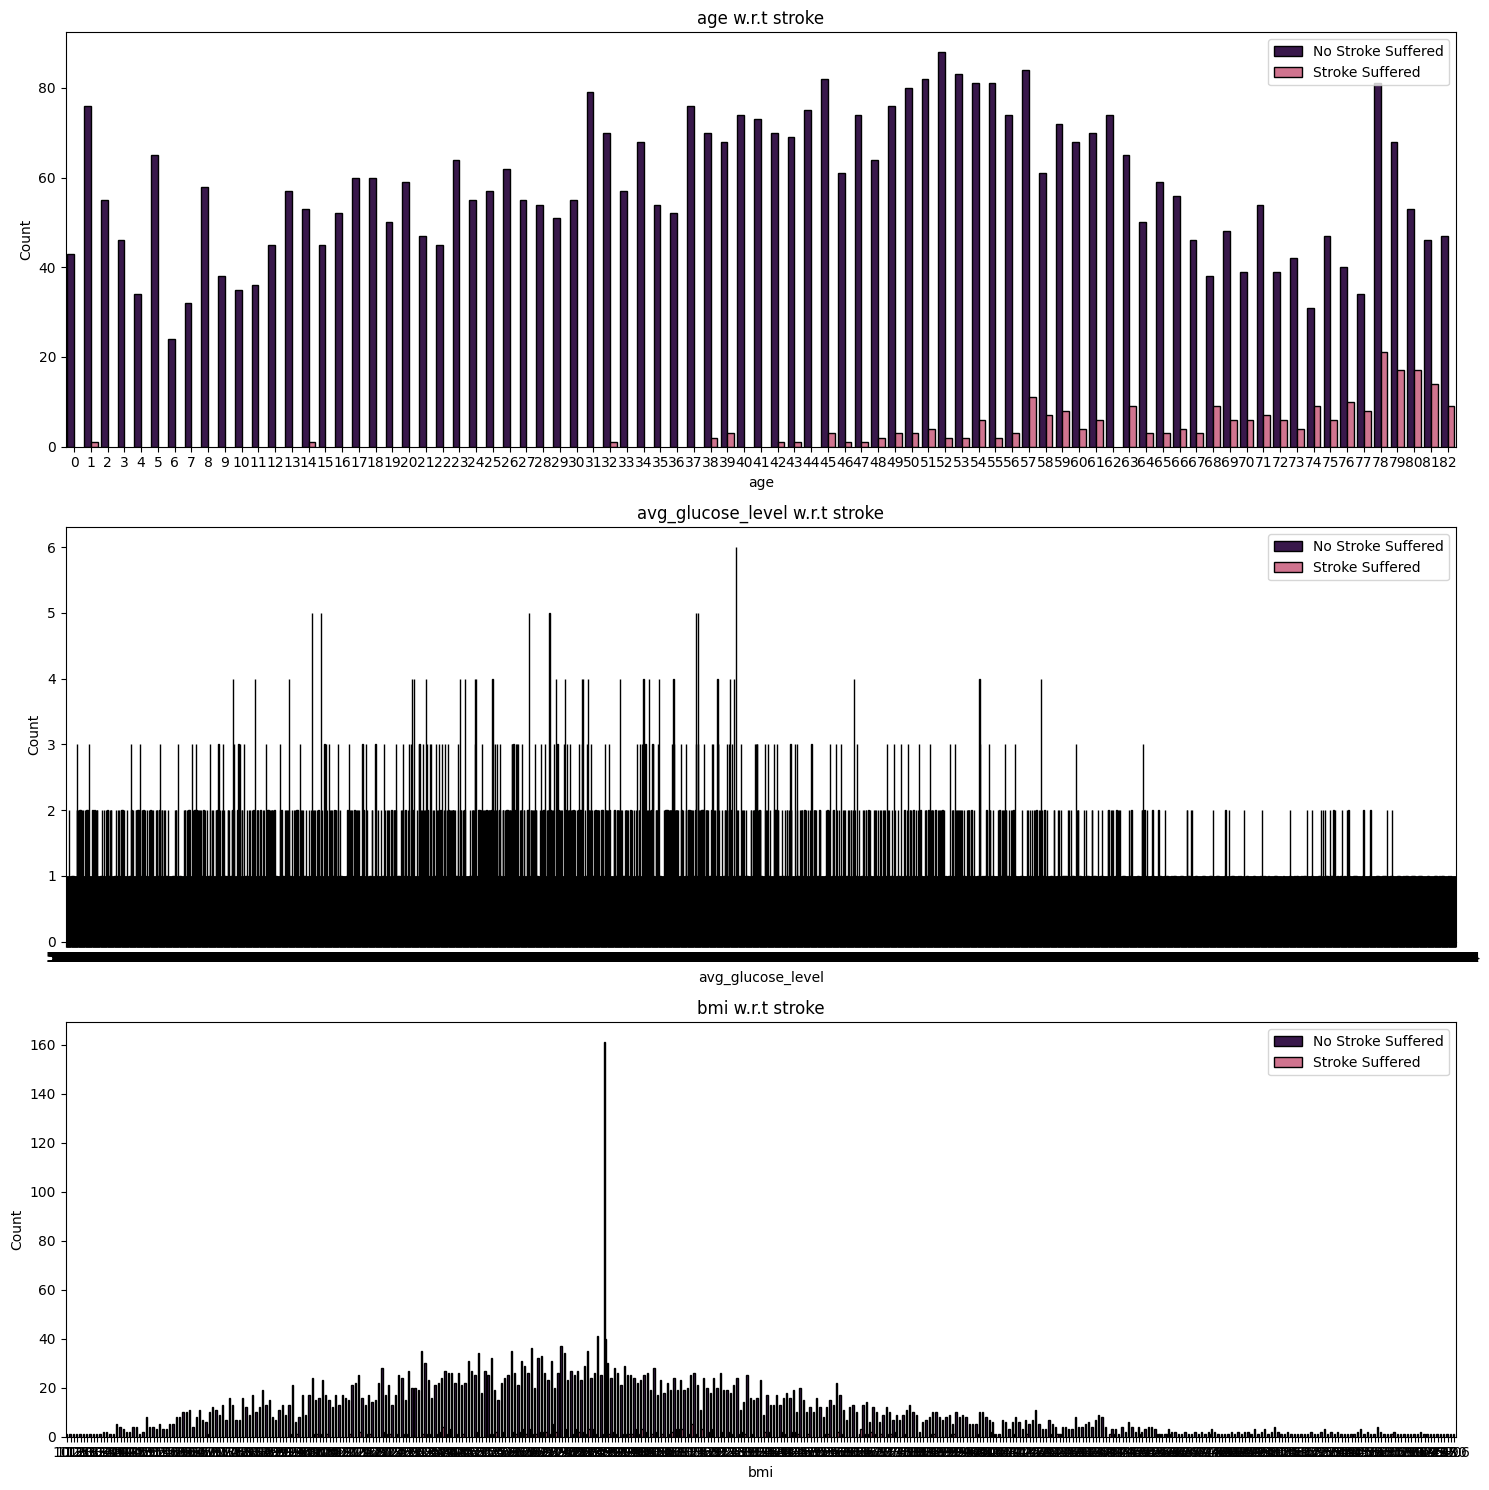

In [12]:
# Создаем фигуру с тремя графиками
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Цикл для построения графиков
for i, feature in enumerate(discrete_features):
    # Проверяем, чтобы не выходить за пределы осей
    if i < len(axes):
        sns.countplot(
            x=feature,
            data=df1,
            hue="stroke",
            palette=colors,
            edgecolor='black',
            ax=axes[i]  # Используем конкретную ось
        )
        # Настройка легенды
        axes[i].legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
        # Заголовок графика
        title = feature + ' w.r.t stroke'
        axes[i].set_title(title)
        # Установка меток для лучшей читаемости
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

# Улучшаем layout для избежания наложений
plt.tight_layout()

# Показываем график один раз
plt.show()

Из-за слишком большого количества уникальных значений в дискретных признаках сложно получить какие-либо значимые выводы. Поэтому мы преобразуем эти признаки в категориальные для визуализации. Мы масштабируем значения этих признаков к постоянному значению, которое представляет диапазон значений (например, среднее значение). Для этого мы делим значения на константу и присваиваем их целочисленное значение частного в качестве представительного постоянного значения. 

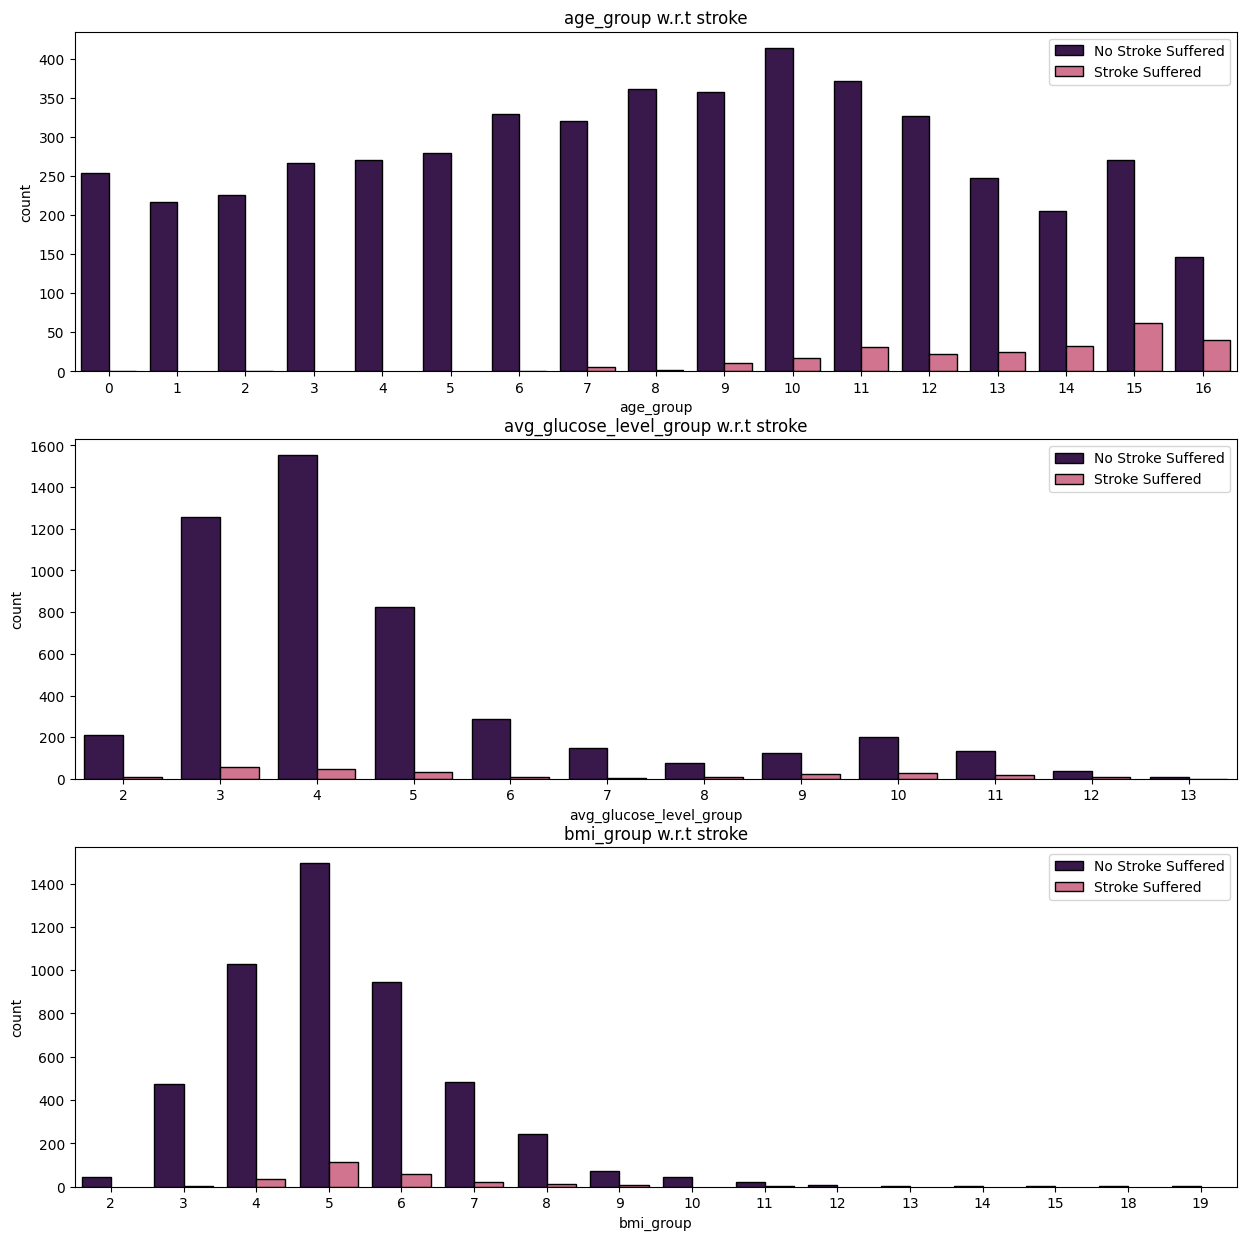

In [13]:
df1['age_group'] = [ int(i / 5) for i in df1['age']]
df1['avg_glucose_level_group'] = [ int(i / 20) for i in df1['avg_glucose_level']]
df1['bmi_group'] = [ int(i / 5) for i in df1['bmi']]
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
group_numerical_features = [i + '_group' for i in ['age','avg_glucose_level','bmi']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(x=group_numerical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = group_numerical_features[i] + ' w.r.t stroke'
    plt.title(title);
plt.show()

Для возраста, случаи перенесенного инсульта можно наблюдать в диапазоне значений от 35 (7×5) до 80 (16×5). Это не является доминирующим сегментом из-за несбалансированной природы набора данных.

Для уровня среднего сахара в крови (avg_glucose_level) можно выделить две группы: 60 (3×20) — 100 (5×20) и 180 (9×20) — 220 (11×20). Пациенты с уровнем среднего сахара в крови из первой группы более подвержены риску инсульта, чем пациенты из второй группы.

Значения индекса массы тела (bmi) в диапазоне от 15 (3×5) до 40 (8×5) продемонстрировали большее количество случаев инсульта.

теперь оценим категориальные признаки

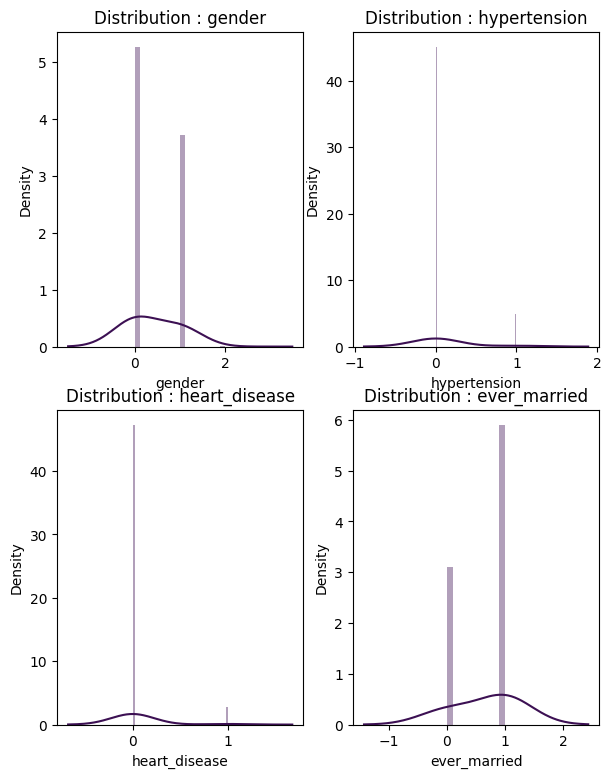

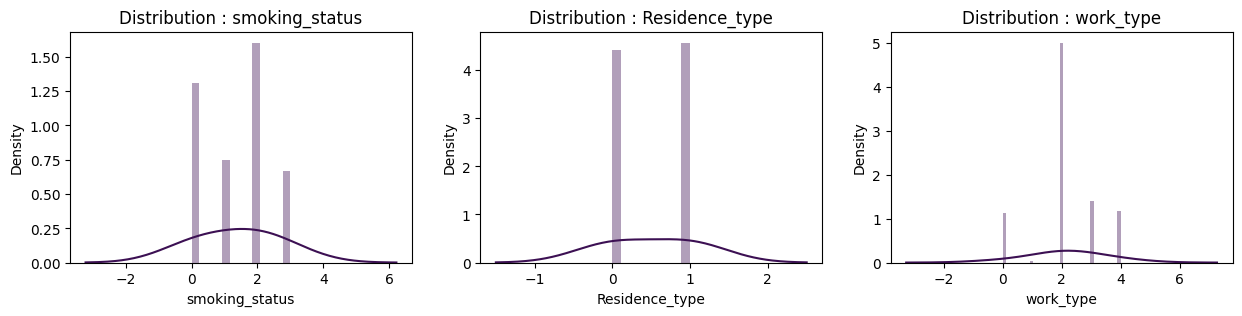

In [14]:
categorical_features.remove('stroke')
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (7,9))
for i in range(len(categorical_features[:4])):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
plt.show()
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
plt.show()

теперь относительно инсульта

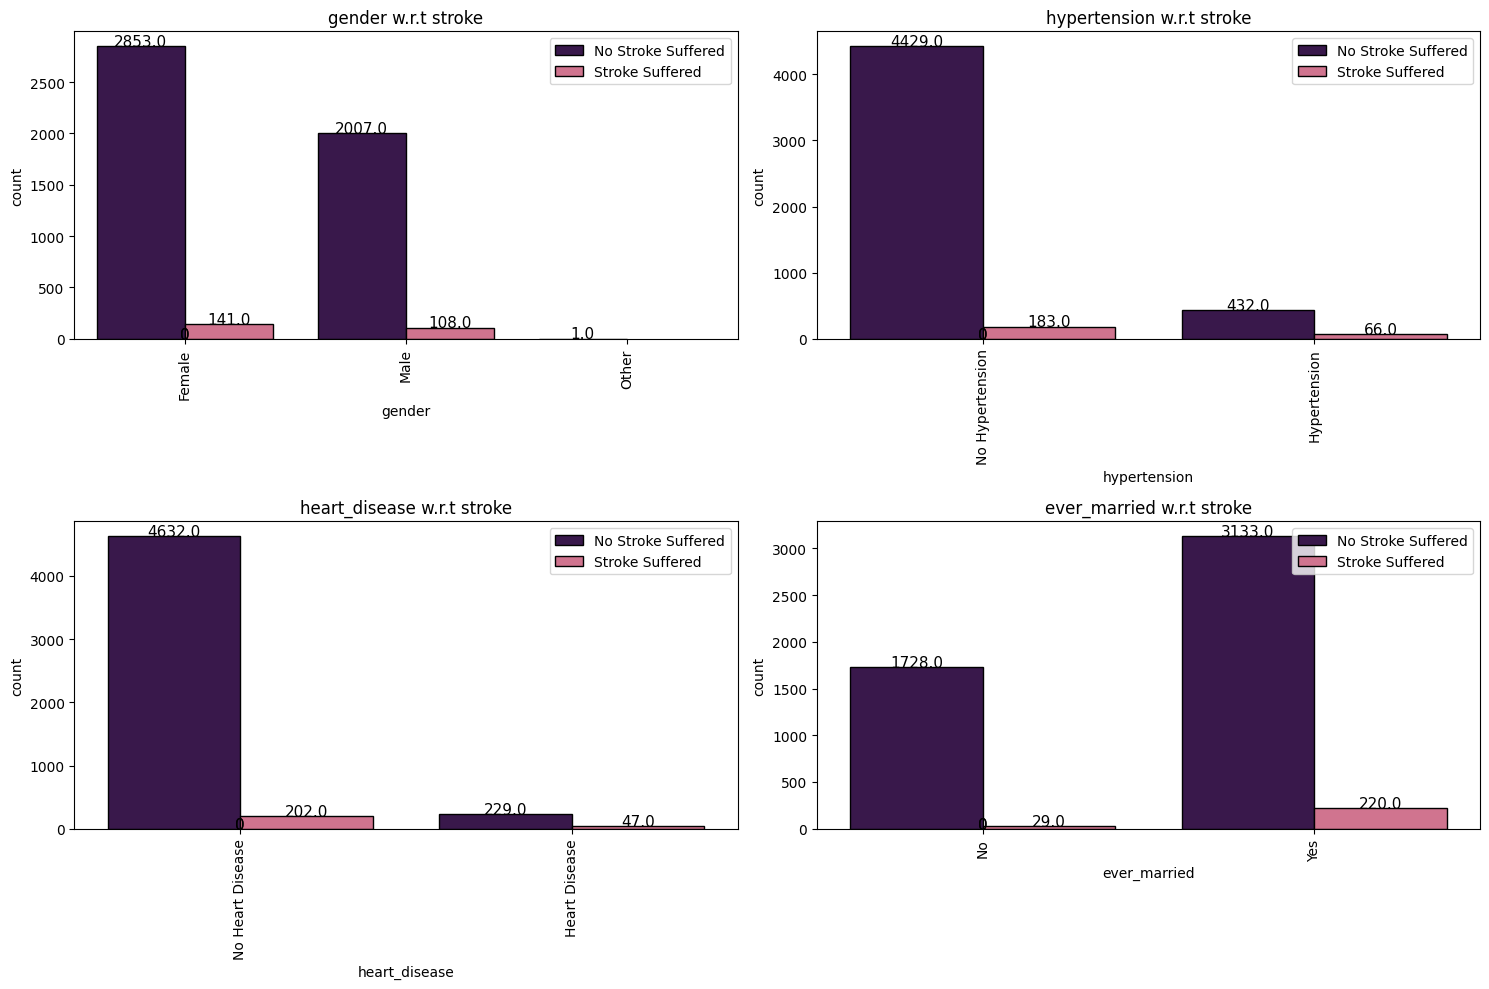

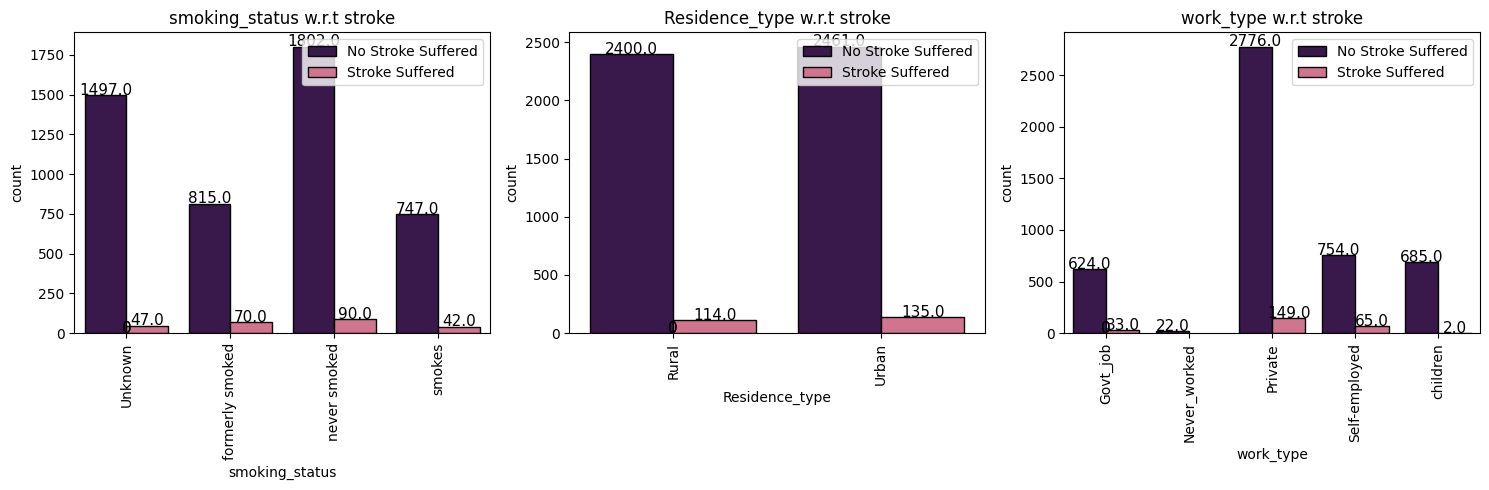

In [15]:
# Первый блок графиков (2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i in range(4):
    ax = sns.countplot(
        x=categorical_features[i],
        data=df1,
        hue="stroke",
        palette=colors,
        edgecolor='black',
        ax=axes[i // 2, i % 2]  # Используем конкретную ось
    )
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 2,
            rect.get_height(),
            horizontalalignment='center',
            fontsize=11
        )
    # Поворот меток на оси X для лучшей читаемости
    ax.set_xticklabels(
        [tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())],
        rotation=90  # Поворот меток на 90 градусов
    )
    ax.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Второй блок графиков (1x3)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i in range(-1, -4, -1):
    ax = sns.countplot(
        x=categorical_features[i],
        data=df1,
        hue="stroke",
        palette=colors,
        edgecolor='black',
        ax=axes[-i - 1]  # Используем конкретную ось
    )
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 2,
            rect.get_height(),
            horizontalalignment='center',
            fontsize=11
        )
    # Поворот меток на оси X для лучшей читаемости
    ax.set_xticklabels(
        [tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())],
        rotation=90  # Поворот меток на 90 градусов
    )
    ax.legend(['No Stroke Suffered', 'Stroke Suffered'], loc='upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    ax.set_title(title)

plt.tight_layout()
plt.show()

категориальные признаки относительно подтвержденных случаев инсульта

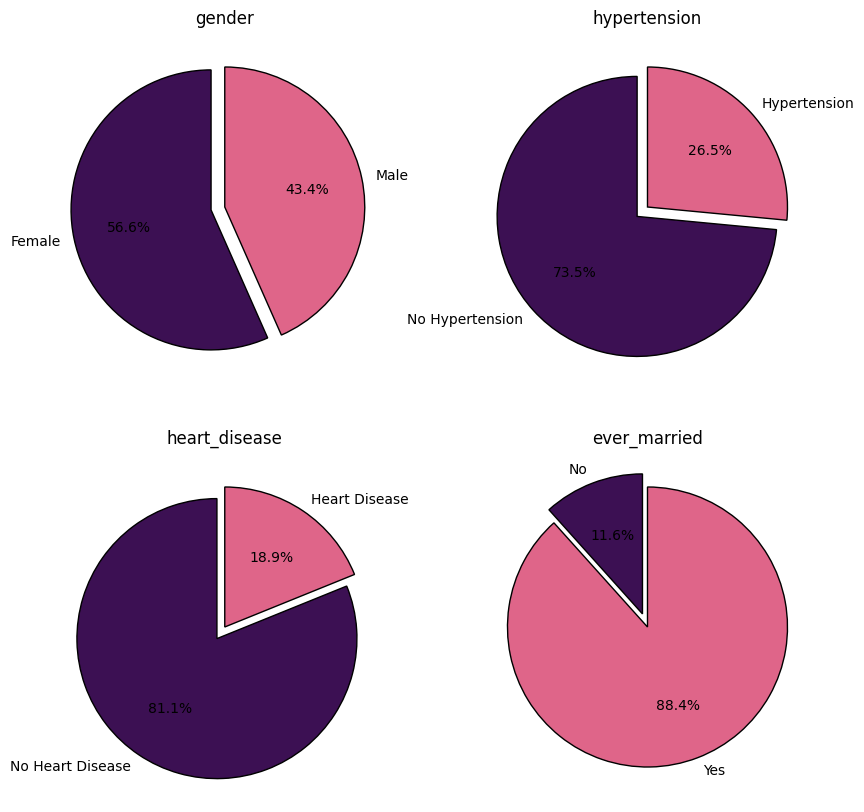

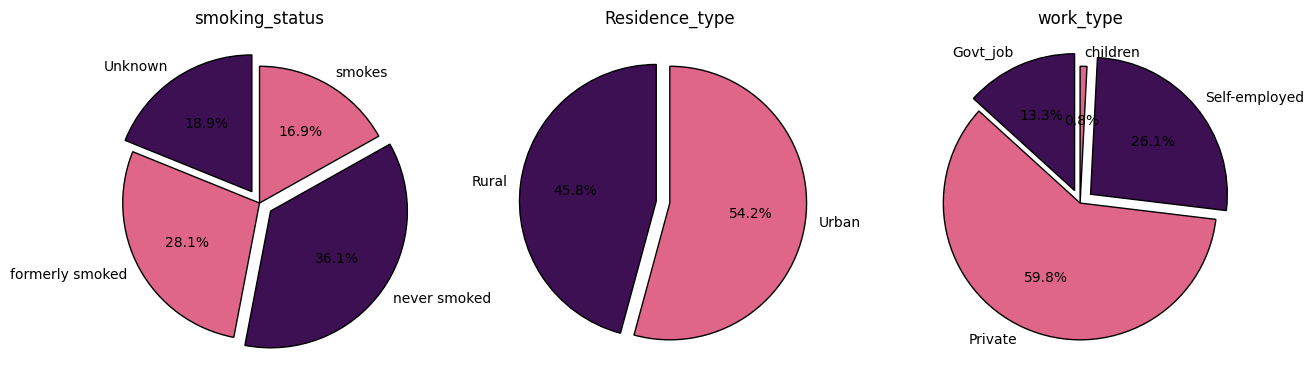

In [16]:
gender = df1[df1['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

hypertension = df1[df1['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]

heart_disease = df1[df1['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]

ever_married = df1[df1['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]

work_type = df1[df1['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[0] / sum(work_type) * 100, work_type[2] / sum(work_type) * 100,
             work_type[3] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100,]

Residence_type = df1[df1['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]

smoking_status = df1[df1['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]
l1 = [gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status]

ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(4):
    if len(l1[i]) == 2:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])
    else:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])
plt.show()
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(-1,-4,-1):
    if len(l1[i]) == 2:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])
    else:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])
plt.show()

Согласно данным, население женщин более подвержено риску инсульта.
Из приведенных визуализаций удивительно, что случаи инсульта чаще встречались у пациентов, не имеющих никаких медицинских условий, таких как болезни сердца или гипертония!
Люди, которые в браке, имеют наибольшую вероятность перенести инсульт. За ними следуют те, кто раньше курил. Удивительно, но люди, которые курят, имеют наименьшие шансы перенести инсульт.
Люди, проживающие в городской местности (Urban Residence Type), по количеству случаев инсульта немного опередили тех, кто живет в сельской местности (Rural Residence Type).
В разрезе вида занятости (work_type), сотрудники частных компаний (Private) зарегистрировали более 50%+ случаев инсульта. За ними следуют самозанятые (Self-employed) и те, кто работает на государственной службе (Govt_job), которые зафиксировали соответственно половину и четверть случаев по сравнению с теми, что были зарегистрированы среди работников частного сектора

### Балансировка данных

In [17]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,:'smoking_status']
t1 = df1.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

Здесь мы сбалансировали данные, сначала уменьшив количество примеров в группе большинства, а затем увеличив количество примеров в группе меньшинства до уровня группы большинства.

Для несбалансированных датасетов мы дублируем данные, чтобы справиться с потенциальным смещением в прогнозах. Из-за процесса дублирования мы используем синтетические данные для моделирования, чтобы обеспечить, что прогнозы не будут склоняться в сторону класса большинства.

Таким образом, оценка моделей с использованием точности (accuracy) будет вводящей в заблуждение. Вместо этого мы будем использовать матрицу ошибок (confusion matrix), график ROC-AUC и показатель ROC-AUC для оценки модели.

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)
x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [20]:
x_train1, x_test1, y_train1, y_test1 = x_train.values, x_test.values, y_train.values, y_test.values

In [21]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

XGBoostClassifier

Cross Validation Score :  93.08%
ROC_AUC Score :  83.48%


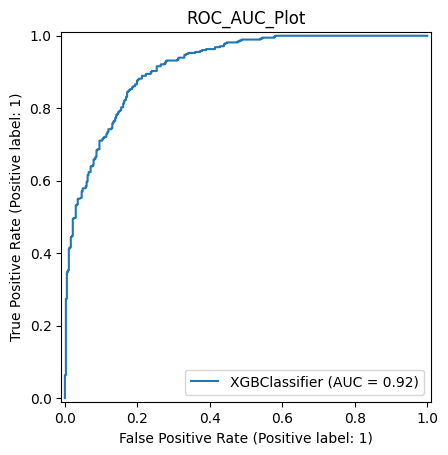

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       367
           1       0.82      0.86      0.84       380

    accuracy                           0.84       747
   macro avg       0.84      0.83      0.84       747
weighted avg       0.84      0.84      0.84       747



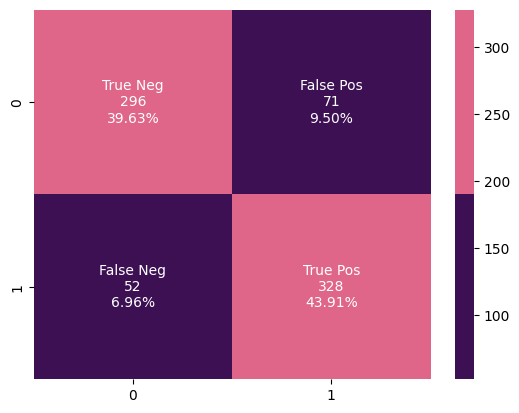

In [22]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Создаём модели
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "XGBoost": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)
}

# Обучение и оценка моделей
results = {}

for name, model in models.items():
    print(f"Обучение {name}...")
    model.fit(x_train1, y_train1)
    y_pred = model.predict(x_test1)
    
    roc_auc = roc_auc_score(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    
    results[name] = {"ROC AUC": roc_auc, "Precision": precision, "Recall": recall}

print("Результаты моделей:")
df_results = pd.DataFrame(results).T
print(df_results)


Обучение Random Forest...
Обучение Gradient Boosting...
Обучение Logistic Regression...
Обучение XGBoost...
Результаты моделей:
                     ROC AUC  Precision  Recall
Random Forest           0.80       0.78    0.86
Gradient Boosting       0.83       0.82    0.85
Logistic Regression     0.78       0.78    0.78
XGBoost                 0.83       0.82    0.86


лучшая Gradient Boosting

In [24]:
import joblib

# Сохранение модели в файл model.pkl
joblib.dump(model, "model.pkl")
print("Модель успешно сохранена в файл model.pkl")

# Загрузка модели
loaded_model = joblib.load("model.pkl")
print("Модель успешно загружена")

Модель успешно сохранена в файл model.pkl
Модель успешно загружена


In [28]:
import numpy as np
import pandas as pd

# Предположим, что df1 — это DataFrame, содержащий все данные, а x_train1 — это numpy-массив.
# Получаем средние значения для числовых столбцов из исходного DataFrame
mean_age = df1["age"].mean()
mean_glucose = df1["avg_glucose_level"].mean()
mean_bmi = df1["bmi"].mean()

# Получаем модальные значения (самые частые) для категориальных признаков
most_common_gender = df1["gender"].mode()[0]

most_common_work = df1["work_type"].mode()[0]

most_common_residence = df1["Residence_type"].mode()[0]

most_common_smoking = df1["smoking_status"].mode()[0]

def safe_input(prompt, default_value, value_type):
    """
    Запрашивает ввод у пользователя. Если введено пустое значение (Enter), возвращает default_value.
    Если тип value_type - число, проверяет корректность ввода.
    """
    while True:
        user_input = input(prompt).strip()
        if user_input == "":  # Если нажали Enter
            return default_value
        try:
            return value_type(user_input)  # Преобразуем в нужный тип
        except ValueError:
            print("Некорректный ввод. Попробуйте ещё раз.")

def get_patient_data():
    """
    Запрашивает у пользователя ввод данных пациента, подставляя средние значения при отсутствии ввода.
    """
    print("\nВведите данные пациента (нажмите Enter, чтобы использовать средние значения)\n")

    gender = input("Пол (Мужчина/Женщина): ").strip().capitalize() or most_common_gender
    age = safe_input(f"Возраст: ", mean_age, float)
    hypertension = safe_input("Гипертония (0 - нет, 1 - да): ", 0, int)
    heart_disease = safe_input("Болезни сердца (0 - нет, 1 - да): ", 0, int)
    ever_married = safe_input("Был(а) женат(а)? (0 - нет, 1 - да): ", 0, int)
    work_type = input("Тип работы (Я ребенок/Госслужащий/Никогда не работал/Негосударственная работа/Самозанятый): ").strip().capitalize() or most_common_work
    residence_type = input("Тип проживания (Город/Село): ").strip().capitalize() or most_common_residence
    avg_glucose_level = safe_input(f"Средний уровень глюкозы (по умолчанию {mean_glucose:.1f}): ", mean_glucose, float)
    bmi = safe_input(f"Индекс массы тела: ", mean_bmi, float)
    smoking_status = input("Статус курения (Ранее курил/Никогда не курил/Курю/Неизвестно): ").strip().capitalize() or most_common_smoking

    # Словари перевода
    gender_map = {"Мужчина": 1, "Женщина": 0}
    residence_map = {"Город": 1, "Село": 0}
    work_type_map = {"Я ребенок": 0, "Госслужащий": 1, "Никогда не работал": 2, "Негосударственная работа": 3, "Самозанятый": 4}
    smoking_status_map = {"Ранее курил(а)": 0, "Никогда не курил(а)": 1, "Курю": 2, "Неизвестно": 3}

    # Преобразуем ввод пользователя в числовой формат
    patient_data = np.array([[
        gender_map.get(gender, most_common_gender),  # Если ввод неверный, ставим самое частое значение
        age,
        hypertension,
        heart_disease,
        ever_married,
        work_type_map.get(work_type, most_common_work),
        residence_map.get(residence_type, most_common_residence),
        avg_glucose_level,
        bmi,
        smoking_status_map.get(smoking_status, most_common_smoking)
    ]])

    return patient_data

def predict_stroke(model, patient_data):
    """
    Функция принимает обученную модель и данные пациента и возвращает вероятность инсульта.
    """
    probability = model.predict_proba(patient_data)[:, 1]  # Берём вероятность положительного класса
    return probability[0]

def classify_risk(probability):
    """
    Классифицирует вероятность инсульта в 5 категорий риска.
    """
    if probability < 0.1:
        return "Крайне низкий риск"
    elif probability < 0.3:
        return "Низкий риск"
    elif probability < 0.6:
        return "Средний риск"
    elif probability < 0.9:
        return "Высокий риск"
    else:
        return "Крайне высокий риск"

# Получаем данные пациента от пользователя
patient_data = get_patient_data()

# Прогнозируем вероятность инсульта
probability = predict_stroke(loaded_model, patient_data)
risk_category = classify_risk(probability)

# Выводим результат
print(f"\nВероятность инсульта: {probability:.2%}")
print(f"Категория риска: {risk_category}")


Введите данные пациента (нажмите Enter, чтобы использовать средние значения)



Пол (Мужчина/Женщина):  Мужчина
Возраст:  21
Гипертония (0 - нет, 1 - да):  0
Болезни сердца (0 - нет, 1 - да):  0
Был(а) женат(а)? (0 - нет, 1 - да):  0
Тип работы (Я ребенок/Госслужащий/Никогда не работал/Негосударственная работа/Самозанятый):  Негосударственная работа
Тип проживания (Город/Село):  Город
Средний уровень глюкозы (по умолчанию 106.1):  45
Индекс массы тела:  24
Статус курения (Ранее курил/Никогда не курил/Курю/Неизвестно):  Никогда не курил



Вероятность инсульта: 0.64%
Категория риска: Крайне низкий риск
